### Polynomial Regression 을 이용한 Underfitting, Overfitting 이해

#### cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
def true_func(X):
  """
  랜덤값으로 구성된 X값에 대해 Cosine변환값을 반환
  """
  return np.cos(1.5 * np.pi * X)

In [3]:
def show_scatter(n_samples=30):
  """
  plot scatter diagram 
  """
  np.random.seed(0)
  # X는 0과 1사이의 30개의 random 값을 순서대로 sampling 한 데이타(실수값)
  X = np.sort(np.random.rand(n_samples))
  display(X, X.shape)
  
  # y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
  y = true_func(X) + np.random.randn(n_samples) * 0.1

  plt.scatter(X, y)
  plt.show()

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

(30,)

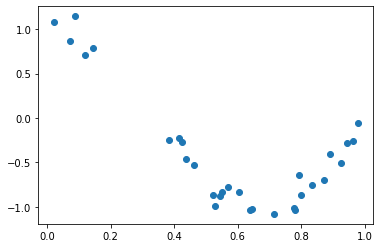

In [4]:
# 샘플링 갯수  - 디폴트 30
show_scatter()

array([0.0187898 , 0.0202184 , 0.06022547, 0.07103606, 0.0871293 ,
       0.11827443, 0.1289263 , 0.14335329, 0.21038256, 0.26455561,
       0.31542835, 0.3595079 , 0.36371077, 0.38344152, 0.41466194,
       0.4236548 , 0.43703195, 0.43758721, 0.45615033, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.56843395, 0.60276338, 0.61209572, 0.616934  , 0.6176355 ,
       0.63992102, 0.64589411, 0.66676672, 0.67063787, 0.6818203 ,
       0.6976312 , 0.71518937, 0.77423369, 0.77815675, 0.78052918,
       0.79172504, 0.79915856, 0.83261985, 0.87001215, 0.891773  ,
       0.92559664, 0.94374808, 0.94466892, 0.96366276, 0.97861834])

(50,)

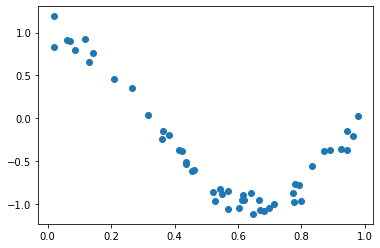

In [5]:
show_scatter(50)

#### 다항회귀의 차수변화를 통해 평가

##### REPL(Read Evaluation Print Loop)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


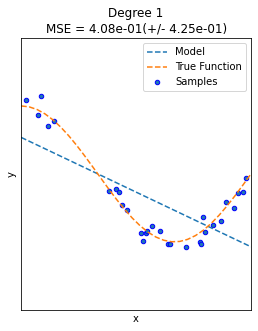

In [29]:
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 3, 1) # 행, 컬럼, 인덱스
plt.setp(ax, xticks=(), yticks=())

polynomial_features = PolynomialFeatures(degree=1,include_bias=False)
linearRegression = LinearRegression()

pipeline = Pipeline([('PolynomialFeatures', polynomial_features), ('LinearRegression', linearRegression)])

np.random.seed(0)
n_samples = 30

# X는 0과 1사이의 30개의 random 값을 순서대로 sampling 한 데이타(실수값)
X = np.sort(np.random.rand(n_samples))
y = true_func(X) + np.random.randn(n_samples) * 0.1
pipeline.fit(X.reshape(-1,1), y)

# 교차검증으로 다항회귀 평가
scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=-1)
coefficients = pipeline.named_steps['LinearRegression'].coef_

print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(1, np.round(coefficients),2))
print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(1 , -1*np.mean(scores)))

# 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
# 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다  
X_test = np.linspace(start = 0, stop = 1, num=n_samples)

# 예측값 곡선
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]),linestyle='dashed', label='Model')
# 실제값 곡선
plt.plot(X_test, true_func(X_test), linestyle='--', label='True Function')
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(1, -scores.mean(), scores.std()))

plt.show()


#ax = plt.subplot(1, 3, 2)
#plt.setp(ax, xticks=(), yticks=())
#ax = plt.subplot(1, 3, 3)
#plt.setp(ax, xticks=(), yticks=())

In [30]:
X_test = np.linspace(start = 0, stop = 1, num=30)
display(X_test.shape, X_test)

XX_test = X_test[:,np.newaxis]  # 차원을 변경시킴
display(XX_test.shape, XX_test)

(30,)

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

(30, 1)

array([[0.        ],
       [0.03448276],
       [0.06896552],
       [0.10344828],
       [0.13793103],
       [0.17241379],
       [0.20689655],
       [0.24137931],
       [0.27586207],
       [0.31034483],
       [0.34482759],
       [0.37931034],
       [0.4137931 ],
       [0.44827586],
       [0.48275862],
       [0.51724138],
       [0.55172414],
       [0.5862069 ],
       [0.62068966],
       [0.65517241],
       [0.68965517],
       [0.72413793],
       [0.75862069],
       [0.79310345],
       [0.82758621],
       [0.86206897],
       [0.89655172],
       [0.93103448],
       [0.96551724],
       [1.        ]])

##### Outlook on Overfitting and underfitting

In [37]:
def overlook_underfit_overfit(X, y, degree:list, cv):
  """
  parameter : X, y, degree - 다항식 차수를 리스트로 전달, cv - 교차검증 횟수
  Description : 다항식 차수와 교차검증횟수를 변경해보면 비교
  """
  plt.figure(figsize = (14, 5))

  # 다항 회귀의 차수를 1, 4, 15로 각각 변화시키면서 비교합니다.
  for i in range(len(degree)):
    ax = plt.subplot(1, len(degree), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial변환
    polynomial_features = PolynomialFeatures(degree=degree[i], include_bias=False)
    linearRegression = LinearRegression()

    # 파이프라인을 이용한 수행
    pipeline = Pipeline([('polynomial_features', polynomial_features), ('linearRegression', linearRegression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv = cv)
    coefficeints = pipeline.named_steps['linearRegression'].coef_

    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degree[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degree[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다  
    X_test = np.linspace(start = 0, stop = 1, num=n_samples)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]),linestyle='dashed', label='Model')
    # 실제값 곡선
    plt.plot(X_test, true_func(X_test), linestyle='--', label='True Function')
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degree[i], -scores.mean(), scores.std()))
plt.show()    


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [-2.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.] 입니다.
Degree 15 MSE 는 180526263.29 입니다.

Degree 30 회귀 계수는 [-2.] 입니다.
Degree 30 MSE 는 38432567443.86 입니다.


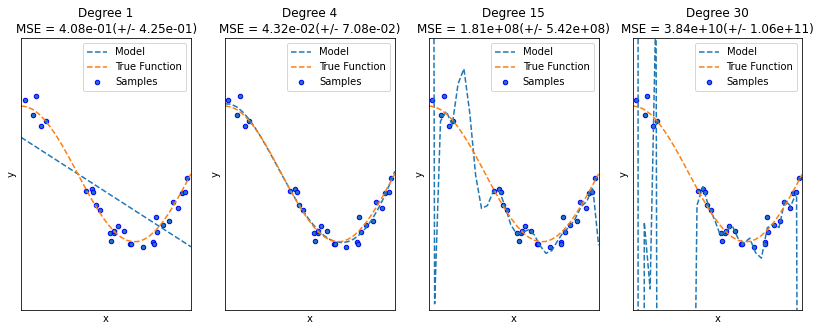

In [39]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_func(X) + np.random.randn(n_samples) * 0.1
degree = [1, 4, 15, 30]
cv = 10

overlook_underfit_overfit(X, y, degree, cv)